In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# Load loan csv file
loan_data=pd.read_csv('loan.csv',low_memory=False)

In [94]:
# Drop columns with only null values
loan_data_1=loan_data.dropna(axis=1,how='all')

In [95]:
loan_data.shape

(39717, 111)

In [96]:
loan_data_1= loan_data_1.loc[:,loan_data_1.nunique()!=1]

In [97]:
loan_data_1.shape

(39717, 48)

In [98]:
drop_columns=['id','member_id','loan_amnt','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','open_acc','desc','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','title','zip_code','issue_d','sub_grade','last_credit_pull_d','last_pymnt_d']
loan_data_1=loan_data_1.drop(drop_columns,axis=1)
loan_data_1.dtypes

funded_amnt                 int64
term                       object
int_rate                   object
installment               float64
grade                      object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
next_pymnt_d               object
pub_rec_bankruptcies      float64
dtype: object

In [99]:
# removing current from loan status
loan_data_1=loan_data_1[loan_data_1.loan_status !='Current']
loan_data_1=loan_data_1.loc[:,loan_data_1.nunique()!=1]

In [100]:
# Converting revol_util and int_rate to numeric type
loan_data_1.revol_util=loan_data_1.revol_util.str.rstrip('%').astype('float')
loan_data_1.int_rate=loan_data_1.int_rate.str.rstrip('%').astype('float')

In [101]:
# Creating a profit and loss column
loan_data_1['ProfitAndLoss']=round((loan_data_1['total_pymnt']-loan_data_1['funded_amnt'])*100/loan_data_1['funded_amnt'],2)

In [112]:
loan_data_1['ProfitAndLoss'].describe()

count    38577.000000
mean         9.328347
std         26.625047
min       -100.000000
25%          8.310000
50%         14.490000
75%         21.490000
max         68.890000
Name: ProfitAndLoss, dtype: float64

In [102]:
# Creating column representing ratio of funded amount and annual income
loan_data_1['loan_inc_ratio']=round(loan_data_1.funded_amnt*100/loan_data_1.annual_inc,0)

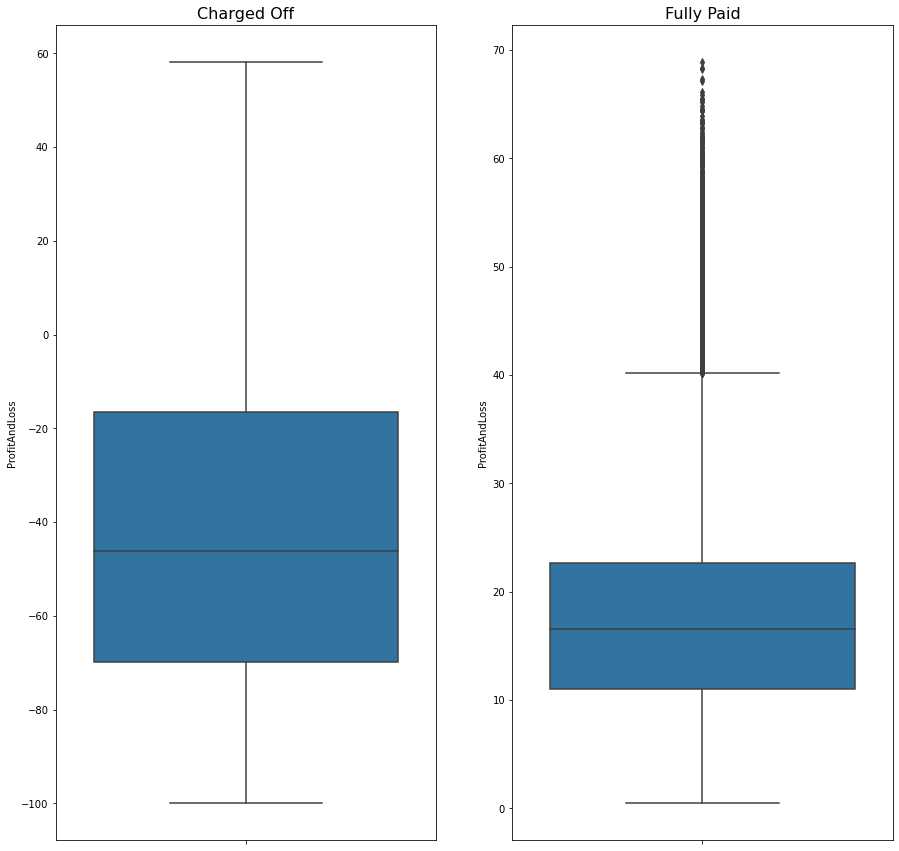

In [103]:
#Relationship of Funded Amount with Charged Off
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Charged Off', fontsize=16)
sns.boxplot(y=loan_data_1[loan_data_1.loan_status=='Charged Off'].ProfitAndLoss)


plt.subplot(1,2,2)
plt.title('Fully Paid', fontsize=16)
sns.boxplot(y=loan_data_1[loan_data_1.loan_status=='Fully Paid'].ProfitAndLoss)
plt.show()

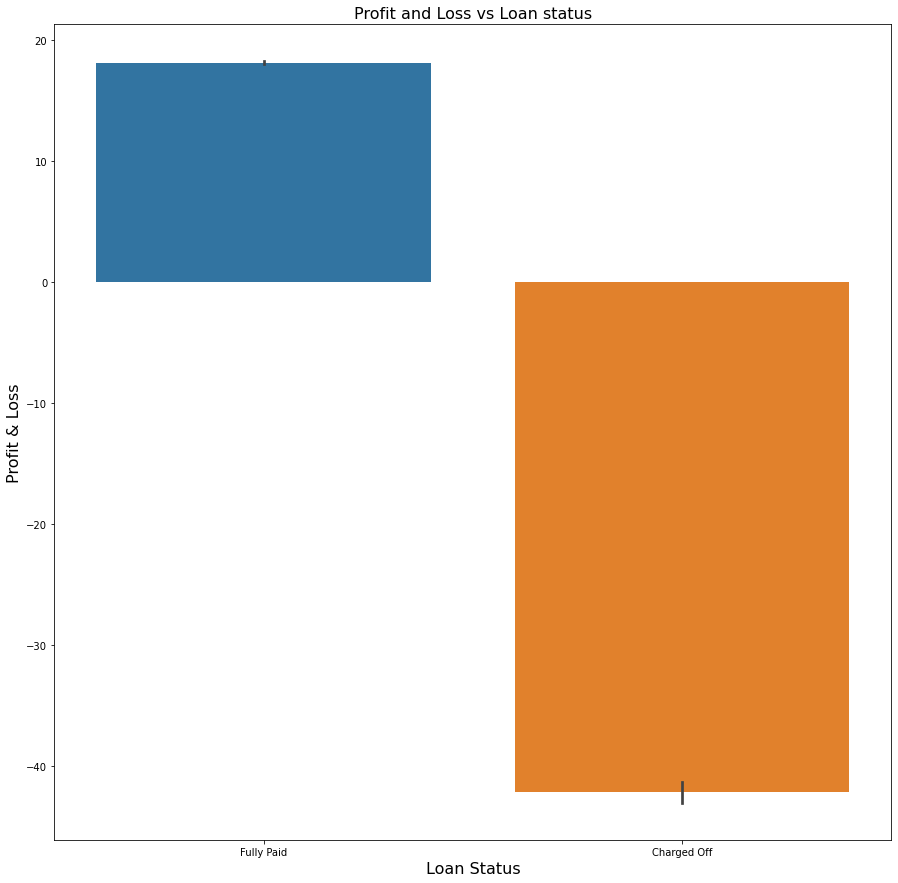

In [104]:
# Relationship of default with funded amount with a barplot
plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='ProfitAndLoss',data=loan_data_1)
plt.xlabel("Loan Status",fontsize=16)
plt.ylabel("Profit & Loss",fontsize=16)
plt.title("Profit and Loss vs Loan status", fontsize=16)
plt.show()

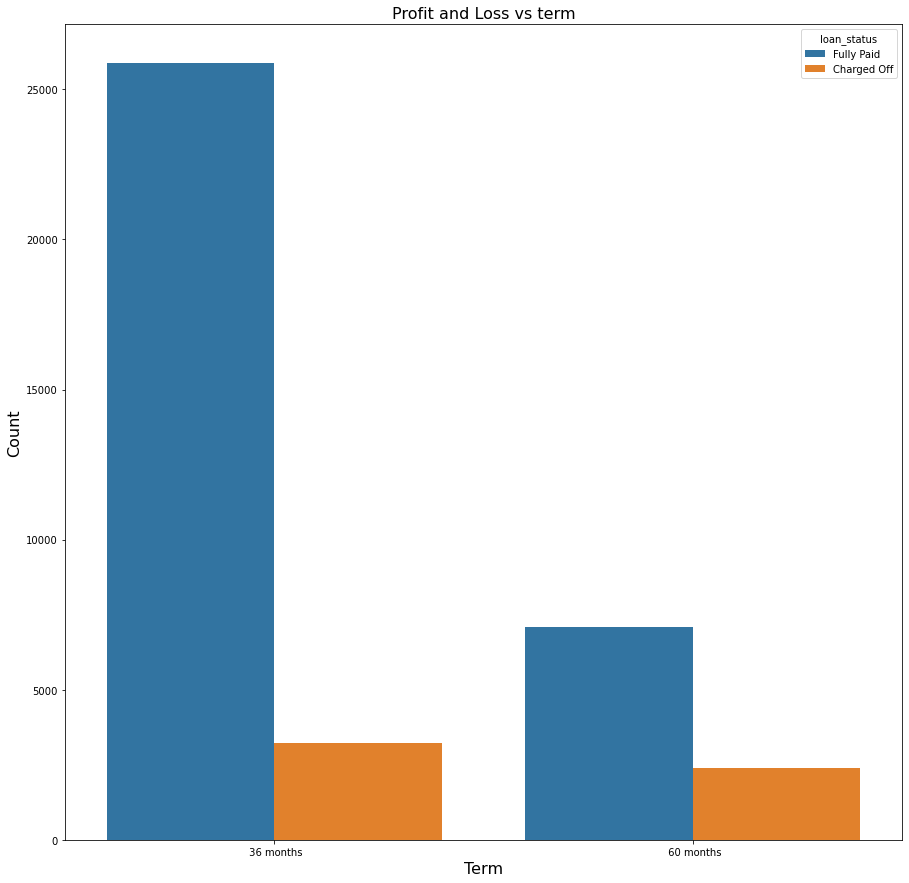

In [105]:
# Relationship of default with term with a barplot
plt.figure(figsize=(15,15))

sns.countplot('term',hue='loan_status',data=loan_data_1)
plt.xlabel("Term",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Profit and Loss vs term",fontsize=16)
plt.show()



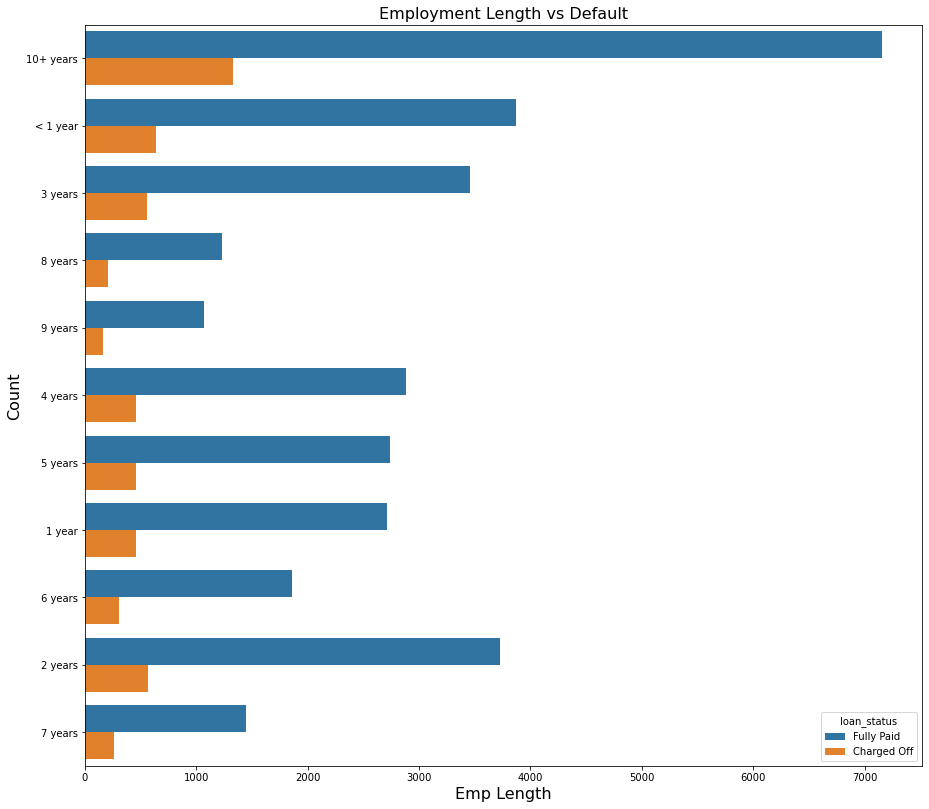

In [107]:
# Relationship of default with employment length with a barplot
plt.figure(figsize=(15,30))

plt.subplot(2,1,2)
sns.countplot(y='emp_length',hue='loan_status',data=loan_data_1)
plt.xlabel("Emp Length",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Employment Length vs Default",fontsize=16)
plt.show()

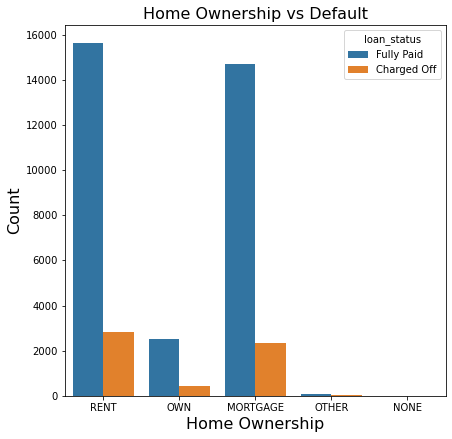

In [109]:
# Relationship of default with Home Ownership with a barplot

plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=loan_data_1)
plt.xlabel("Home Ownership",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Home Ownership vs Default",fontsize=16)
plt.show()

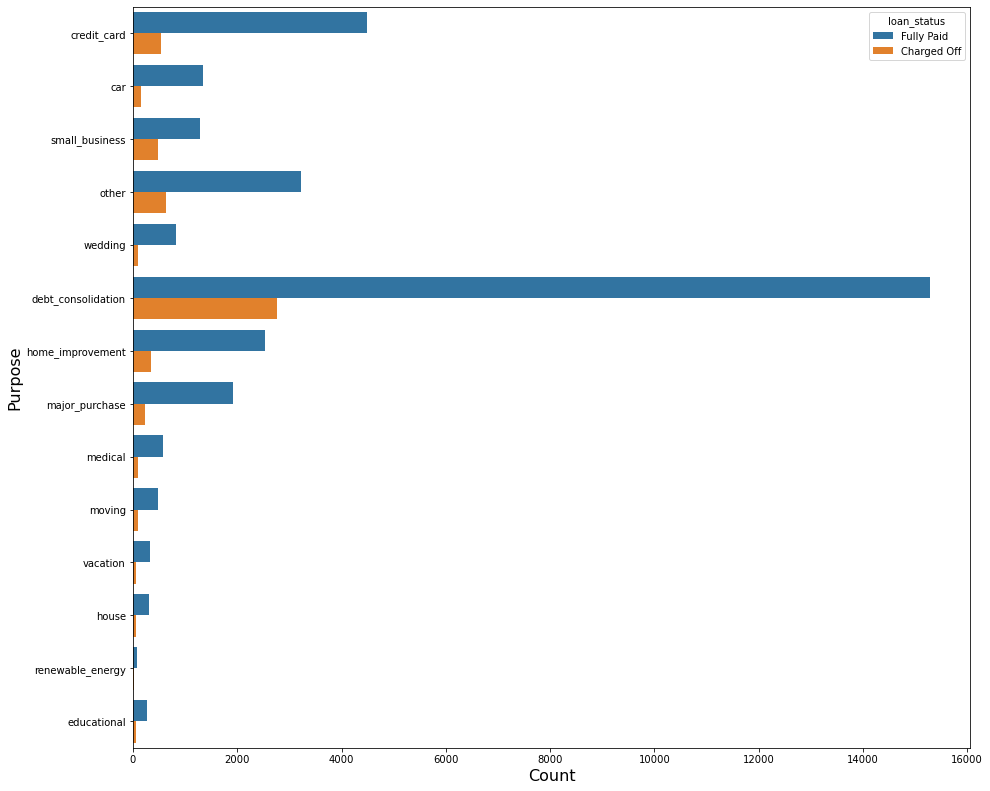

In [110]:
# Relationship of default with purpose with a barplot

plt.figure(figsize=(15,30))
plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loan_data_1)
plt.ylabel("Purpose",fontsize=16)
plt.xlabel("Count",fontsize=16)
plt.show()

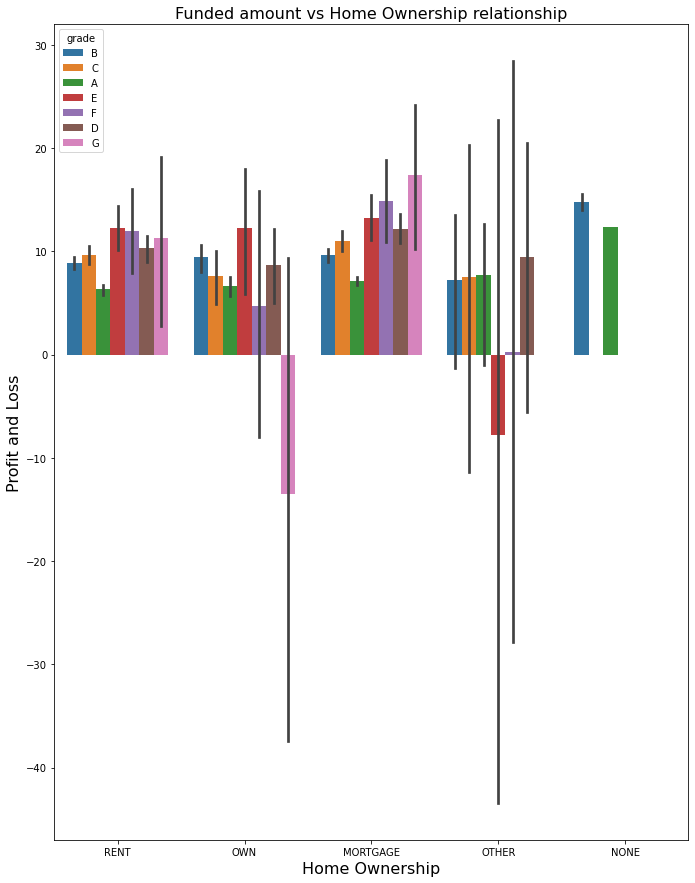

In [111]:
# Relationship of Funded amount vs Home Ownership

plt.figure(figsize=(25,15))
plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='ProfitAndLoss',data=loan_data_1,hue='grade')
plt.xlabel("Home Ownership",fontsize=16)
plt.ylabel("Profit and Loss",fontsize=16)
plt.title("Funded amount vs Home Ownership relationship",fontsize=16)
plt.show()

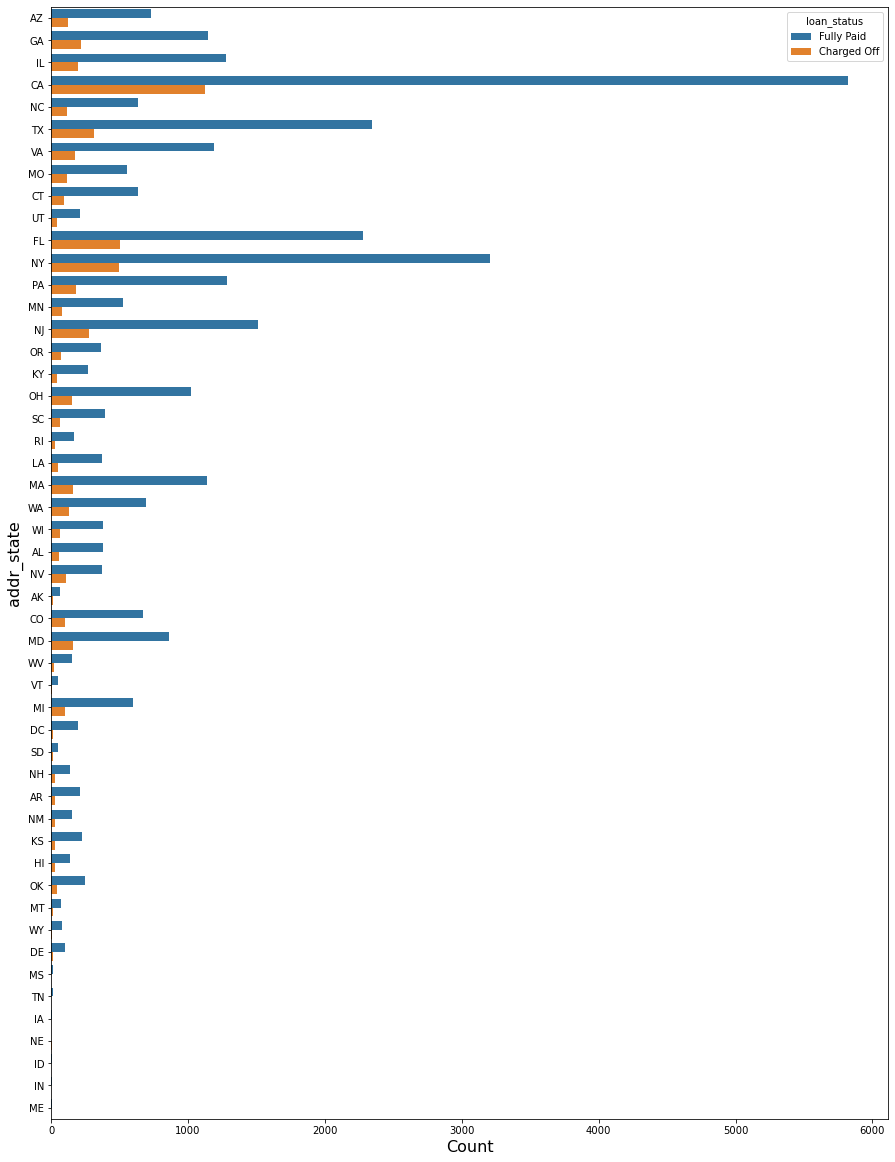

In [114]:
# Relationship of loan status vs Home State

plt.figure(figsize=(15,45))
plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan_data_1)
plt.ylabel("addr_state",fontsize=16)
plt.xlabel("Count",fontsize=16)
plt.show()

<Figure size 1080x3240 with 0 Axes>

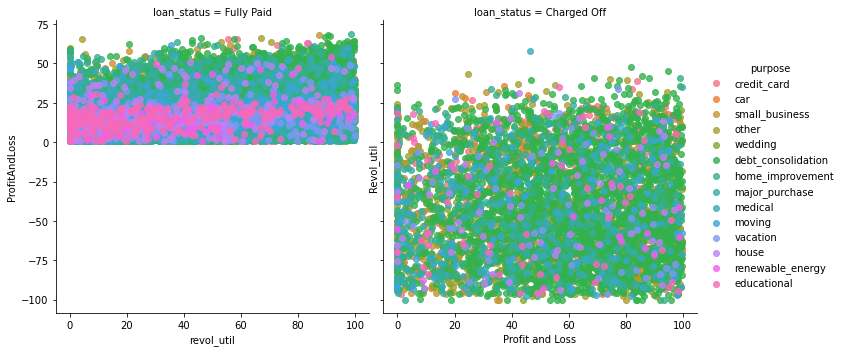

In [81]:
plt.figure(figsize=(15,45))
sns.lmplot(x='revol_util',y='ProfitAndLoss',col='loan_status',hue='purpose',fit_reg=False,data=loan_data_1)
plt.ylabel("Revol_util",fontsize=16)
plt.xlabel("Profit and Loss",fontsize=16)

plt.show()

In [82]:
drop_columns2=['installment','term','total_pymnt_inv','total_rec_prncp']

loan_data_1=loan_data_1.drop(drop_columns2,axis=1)

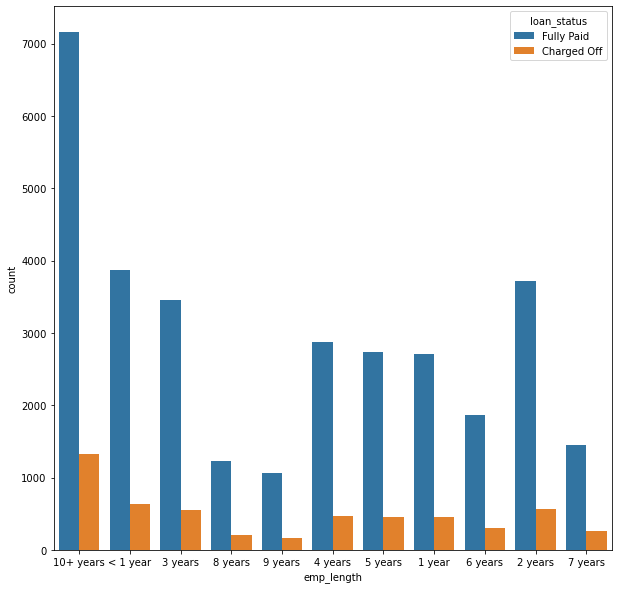

In [83]:
plt.figure(figsize=(10,10))
sns.countplot('emp_length',hue='loan_status',data=loan_data_1)
plt.show()

In [84]:
# Converting employment length into nominal variable
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loan_data_1=loan_data_1.replace(mapping_dict)

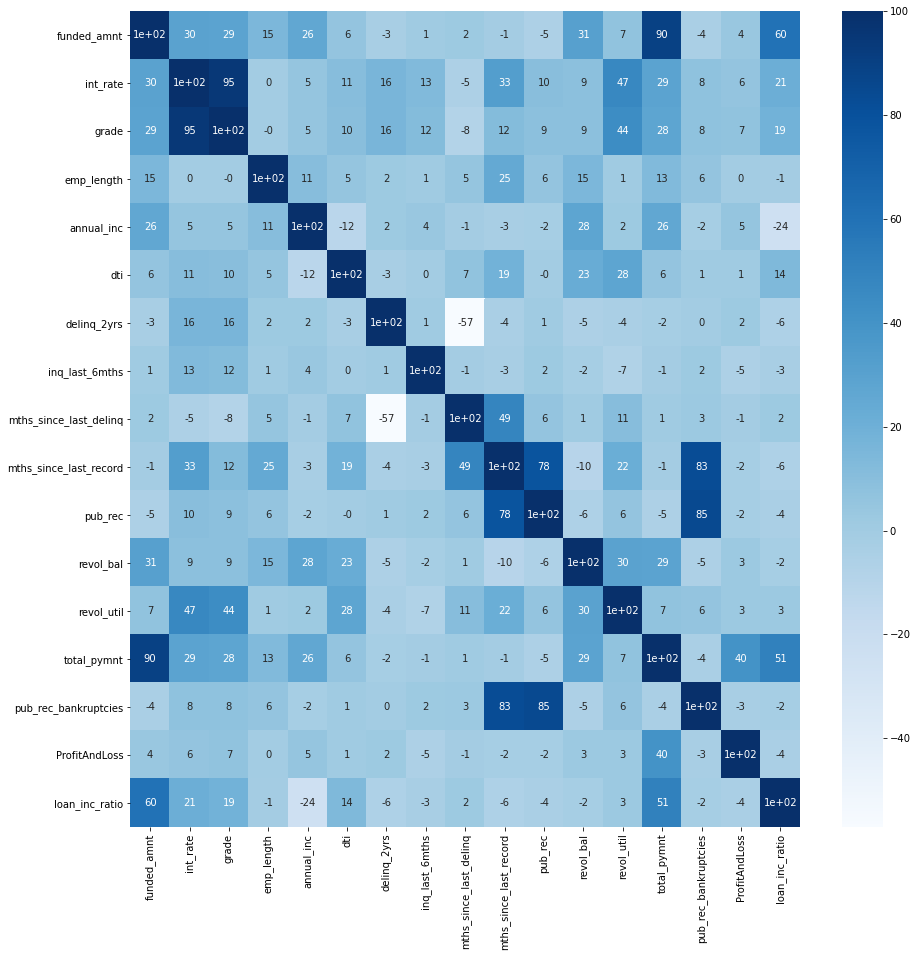

In [85]:
plt.figure(figsize=(15,15))
sns.heatmap(round(loan_data_1.corr()*100,0),annot=True,cmap="Blues")
plt.show()